# Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data Preparation**

In [2]:
df = pd.read_csv('../input/digit-recognizer/train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [8]:
x = data[:,1:]
y = data[:,0]

print(x.shape,y.shape)

(42000, 784) (42000,)


In [9]:
 from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [14]:
print(x_train.shape,y_train.shape)

(33600, 784) (33600,)


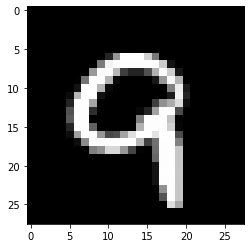

In [19]:
def drawimg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = "gray")
    plt.show()
    
drawimg(x_train[10])

**KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=2)
clf.fit(x_train,y_train)

KNeighborsClassifier()

**Predictions**

In [30]:
y_pred = clf.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[812   0   0   0   0   0   4   0   0   0]
 [  0 906   0   0   0   0   3   0   0   0]
 [  6  15 796   3   2   2   1  20   1   0]
 [  2   4   4 900   0   9   1   6   5   6]
 [  1   5   0   0 811   0   3   1   0  18]
 [  1   2   0  15   1 669   9   0   1   4]
 [  5   0   0   0   0   3 777   0   0   0]
 [  0  18   2   0   1   0   0 857   0  15]
 [  1  12   2  12   3  15   4   1 777   8]
 [  3   3   1  10   6   1   0  12   2 800]]


0.9648809523809524

In [38]:
pred = clf.predict(x_test[[0]])
print(pred)

[8]


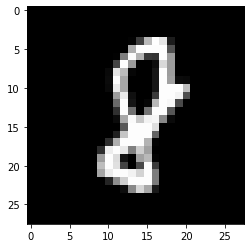

8


In [39]:
drawimg(x_test[0])
print(y_test[0])